In [2]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications import ResNet50,VGG19
from keras.utils import to_categorical
from keras.models import Sequential, Model,load_model
from keras.layers import Dense,Flatten,Dropout,Input
from keras.callbacks import ModelCheckpoint
import math


In [7]:
data_dir = './Datasets/car/DamagedOrNot/train'

# datagen = ImageDataGenerator(preprocessing_function=keras.applications.resnet.preprocess_input,
#                              rescale=1./255, brightness_range=[0.5, 1.5], zoom_range=[0.8, 1.2], validation_split=0.2)
datagen = ImageDataGenerator(
    rescale=1./255, brightness_range=[0.5, 1.5], zoom_range=[0.8, 1.2], validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)
print(train_generator.class_indices)


Found 1472 images belonging to 2 classes.
Found 368 images belonging to 2 classes.
{'damaged': 0, 'not': 1}


In [18]:
# model = VGG16(include_top=False, weights='imagenet')
# nb_train_samples = len(train_generator.filenames)
# bottleneck_features_train = model.predict(
#     train_generator, int(math.ceil(nb_train_samples / 16)))
# np.save('./Models/VGG16_bottleneck_features_train.npy', bottleneck_features_train)
# nb_validation_samples = len(test_generator.filenames)

# predict_size_validation = int(
#     math.ceil(nb_validation_samples / 16))

# bottleneck_features_validation = model.predict(
#     test_generator, predict_size_validation)

# np.save('./Models/VGG16_bottleneck_features_validation.npy',
#         bottleneck_features_validation)


In [4]:
num_classes = len(train_generator.class_indices)

input_layer = Input(shape=(256,256,3),name='Input_Layer')
model = VGG19(include_top=False, weights='imagenet',input_tensor=input_layer)
flatten=Flatten(data_format='channels_last',name='Flatten')(model.output)
L1 = Dense(units=512,activation='relu',name='FC1')(flatten)
L2 = Dense(units=256,activation='relu',name='FC2')(L1)
dropout1 = Dropout(0.5)(L2)
out=Dense(num_classes, activation='sigmoid')(dropout1)
model = Model(inputs=input_layer,outputs=out)

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model=load_model("./Models/BestModels_Severity/VGG19/")

In [6]:
checkpoint = ModelCheckpoint(filepath='./Models/BestModels_Severity/VGG19', monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')
history = model.fit(train_generator,
                    epochs=35,
                    batch_size=16,
                    validation_data=test_generator,callbacks=[checkpoint])

Epoch 1/35
 8/70 [==>...........................] - ETA: 1:05 - loss: 0.8615 - accuracy: 0.5703

KeyboardInterrupt: 

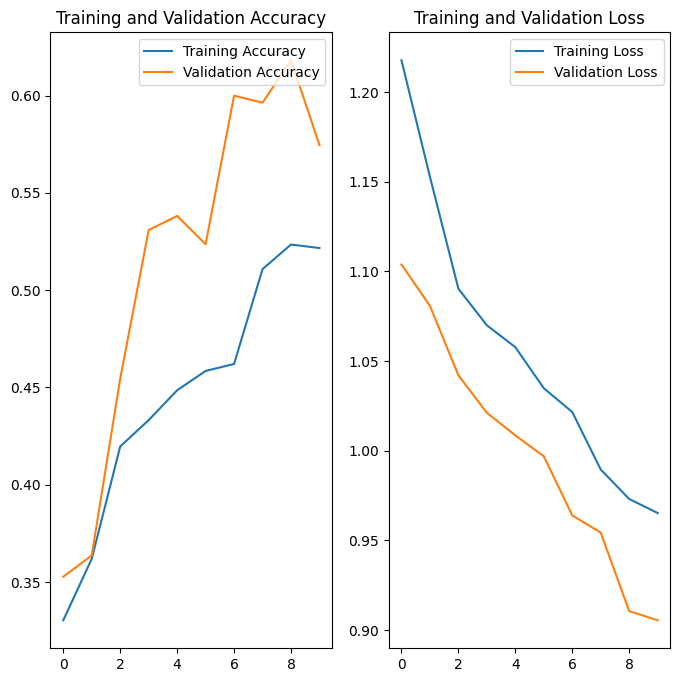

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()